In [1]:
# General imports
import numpy as np
import sys, os
basepath = "../"
sys.path.insert(0, basepath)

In [2]:
# Stuff for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.size"]=16
mpl.rcParams["font.family"]="sans-serif"
mpl.rcParams["text.usetex"]=True
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')

In [3]:
#  Load the 5BZCat catalog
from lib.data import load_5bzcat, catbins, load_hotspots

cat = load_5bzcat(os.path.join(basepath, "data"))

# Load the hotspot list
hotspot_folder = "data/7yrPS_data"
hotspots = load_hotspots(os.path.join(basepath, hotspot_folder), hemisphere='south')

Load 5bzcat.csv
	Found 3469 sources


In [4]:
# Import stuff for the correlation analysis
from lib.correlation import Correlator, EventSample

In [5]:
# Initialize the Correlator object and the sample of hotspots to analyse.
# Note that catbins is useless for our analysis but the framework still requires it.
# scramble=0 will generate the pseudo experiment by scrambling the position of the sources only.
# boots=6 will generate the trial taking care of preserving the number of source,
# the portion of the sky and the latitude cut.
seed = 0
C = Correlator(
    cat, bins=catbins[-1],
    seed=seed,
    dec_range=(np.radians(-85),np.radians(-5)),
    mlat=np.radians(10),
    scramble=0, boots=6)
hs_sample = EventSample(hotspots)

sigmas = np.linspace(0.4, 0.7, 7)
pVal_thrs = np.linspace(3.5, 4.5, 3)
C.add_primary('hotspots', hs_sample, logpVal_thr_list=pVal_thrs, sigma_list=sigmas)


# The max_shift argument scrambles the sources within a maximum distance
# from the original position.
# Running 10000 trials takes ~ 5 minutes.
trials = C.trials(n_trials=5000, max_shift=np.radians(10))

- Setting galactic plane width to 10.0deg
Set scrambling to catalogue
Catalogue: 3469 sources
Applying cuts to the source catalogue:
	Sources in declination range: [-85.  -5.] degrees: 1214.
	Applying galactic plane cut...
	After galactic plane cut: 1177
	1177 sources above 0.00 (100.00%)
Remove sources that are in no bin:   0.00%
Analysis - Initialize with seed 0
Applying cuts to the event sample:
	Events in [-85.  -5.] degrees: 926
	Applying galactic plane cut...
	After galactic plane cut: 774
	Applying the pValue threshold cuts...
-log10(pVal) > 3.5: 44 hotspots will be analysed.
-log10(pVal) > 4.0: 19 hotspots will be analysed.
-log10(pVal) > 4.5: 9 hotspots will be analysed.
-- Calling function trials of <lib.correlation.Correlator object at 0x116be6c80>


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  2.7min finished


--> Time (<lib.correlation.Correlator object at 0x116be6c80>, trials):  0d  0: 2:40.98


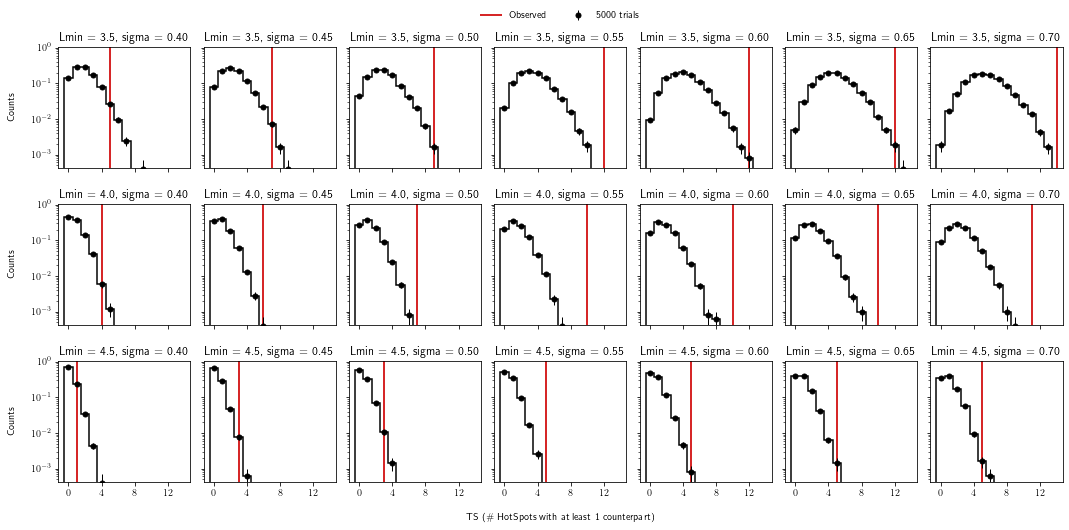

In [24]:
fig,ax = plt.subplots(nrows=3, ncols=7, sharex=True, sharey=True, figsize=(18,8))

ax[2][3].set_xlabel("TS (\# HotSpots with at least 1 counterpart)", labelpad=15)
for axis in ax[:,0]:
    axis.set_ylabel("Counts", labelpad=15)

ax = ax.flatten()
for i,key in enumerate(trials.dtype.names):
    observed_ts = C()[key]
    counts, bins = np.histogram(trials[key], bins=np.arange(0,15))
    binc = 0.5 * (bins[1:] + bins[:-1])-.5
    counts_norm = counts/np.sum(counts)
    ax[i].errorbar(binc, counts_norm, yerr=[np.sqrt(counts)/np.sum(counts),np.sqrt(counts)/np.sum(counts)],
                 fmt="o", color="k", zorder=10, markersize=5, elinewidth=1,
                 label=f"{trials[key].size} trials"
                )
    ax[i].hist(binc, bins-.5, weights=counts_norm, histtype='step', color='k', lw=1.5)
    ax[i].axvline(observed_ts, color="tab:red", label="Observed", lw=2)

    ax[i].set_yscale('log')

    ax[i].set_title(key[10:], fontsize=12)

ax[0].set_xticks([0,4,8,12])
# ax[0].set_xticks([0,1,2,3])
ax[3].legend(frameon=False, loc="lower center", bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.subplots_adjust(hspace=0.3, wspace=.1)

# plt.savefig("../plots/ts_distributions.png",
#            dpi=500, bbox_inches="tight", facecolor="w")
plt.savefig("../../plots/ts_distributions.png",
           dpi=500, bbox_inches="tight", facecolor="w")

In [7]:
res, m_cp = C.get_counterparts(catbins[-1])
res


hotspots: Lmin = 3.5, sigma = 0.40: 5/44 counterparts above [0]
	R.A.[deg]  -  Dec.[deg]  -  HS logpVal  -  Source Name  -  Offset[deg]  -  Redshift
	357.80        -22.35        3.90          5BZQJ2351-2203   0.32            2.05       
	346.03        -36.24        4.03          5BZQJ2304-3625   0.24            0.96       
	59.94         -25.86        4.36          5BZBJ0359-2615   0.40            nan        
	97.56         -23.89        4.42          5BZBJ0630-2406   0.28            nan        
	44.12         -21.78        4.87          5BZQJ0256-2137   0.17            1.47       

hotspots: Lmin = 3.5, sigma = 0.45: 7/44 counterparts above [0]
	R.A.[deg]  -  Dec.[deg]  -  HS logpVal  -  Source Name  -  Offset[deg]  -  Redshift
	357.80        -22.35        3.90          5BZQJ2351-2203   0.32            2.05       
	346.03        -36.24        4.03          5BZQJ2304-3625   0.24            0.96       
	59.94         -25.86        4.36          5BZBJ0359-2615   0.40            nan     

{'hotspots: Lmin = 3.5, sigma = 0.40': array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False,  True,
        False, False, False, False,  True, False,  True, False, False,
        False,  True, False, False, False, False, False, False]),
 'hotspots: Lmin = 3.5, sigma = 0.45': array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False,  True,
        False, False, False, False,  True, False,  True, False, False,
        False,  True, False,  True, False, False,  True, False]),
 'hotspots: Lmin = 3.5, sigma = 0.50': array([False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, F